In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data=pd.read_excel("D:\CREDIT CARD DETECTION\credt.xlsx")

In [3]:
data

,label,message
0,1,"For card 8901 0123 1234 4567, please update ex..."
1,1,"Card 3456 5678 7890 8901, expiring 12/34, requ..."
2,0,Review meeting agenda.
3,0,Lunch at the new restaurant.
4,0,Don't forget to send the report.
5,0,Meeting at 10 AM tomorrow.
6,1,"Confirm card 9012 3456 5678 7890, CVV 345, val..."
7,0,Discuss project timelines.
8,1,Update your card 2345 4567 6789 7890 with expi...
9,1,"Checkout requires card 1234 5678 8765 4321, ex..."


In [4]:
data.shape

(30, 2)

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [6]:
data['message'] = data['message'].apply(preprocess_text)

In [7]:
print(data[['label', 'message']])

    label                                            message
0       1  card 8901 0123 1234 4567 please update expiry ...
1       1  card 3456 5678 7890 8901 expiring 1234 require...
2       0                              review meeting agenda
3       0                               lunch new restaurant
4       0                            dont forget send report
5       0                                meeting 10 tomorrow
6       1  confirm card 9012 3456 5678 7890 cvv 345 valid...
7       0                            discus project timeline
8       1  update card 2345 4567 6789 7890 expiration dat...
9       1  checkout requires card 1234 5678 8765 4321 exp...
10      1  card 5678 6789 7890 1234 expiring 0729 cvv 789...
11      0                      reminder pay electricity bill
12      0            new product launch scheduled next month
13      1  please update payment method following card de...
14      1  card ending 4567 expired please update payment...
15      0            rem

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    30 non-null     int64 
 1   message  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [9]:
data['label'].value_counts()

0    16
1    14
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

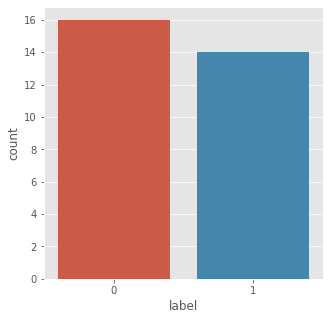

In [10]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = data)

Text(0.5, 1.0, 'Distribution of sentiments')

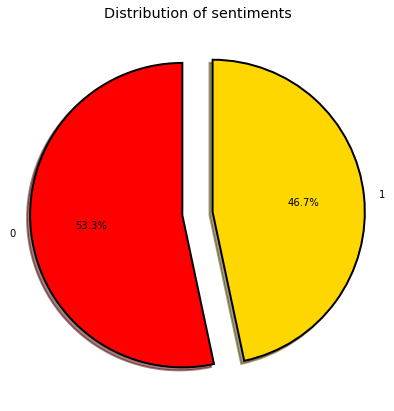

In [11]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [12]:
no_credit_details = data[data.label == 0]
no_credit_details.head()

,label,message
2,0,review meeting agenda
3,0,lunch new restaurant
4,0,dont forget send report
5,0,meeting 10 tomorrow
7,0,discus project timeline


In [1]:
credit_details = data[data.label == 1]
credit_details.head()

NameError: name 'data' is not defined

In [14]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(data['message'])

In [15]:
feature_names = vect.get_feature_names()

E:\Users\KIDDO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
x = data['message']
y = data['label']
x = vect.transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 33.33%


In [19]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[2 0]
 [4 0]]


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         4

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



E:\Users\KIDDO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\KIDDO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\KIDDO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


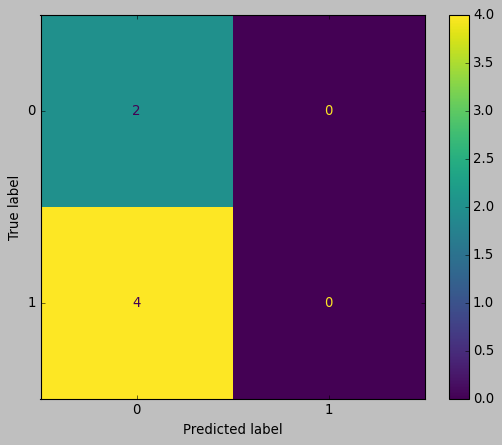

In [20]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [21]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [22]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.87
Best parameters:  {'C': 100, 'solver': 'liblinear'}


In [23]:
y_pred = grid.predict(x_test)

In [24]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 100.00%


In [25]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2 0]
 [0 4]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [26]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words] 
    return ' '.join(filtered_tokens)

In [35]:
import os.path

def predict_credit_card(input_text):
    processed_text = preprocess_text(input_text)  
    X_input = vect.transform([processed_text])  
    prediction = grid.predict(X_input)  
    prediction_text = 'Credit Card Detected' if prediction == 1 else 'No Credit Card Detected'
    result = {
        "Text": input_text,
        "Prediction": prediction_text
    }
    return result

user_input = input("Enter the text: ")
prediction_result = predict_credit_card(user_input)

json_file = "D:\CREDIT CARD DETECTION\credit_output.json"
if os.path.isfile(json_file):
    df = pd.read_json(json_file, orient="records")
else:
    df = pd.DataFrame()

df = df.append(prediction_result, ignore_index=True)
df.to_json(json_file, orient="records")

print("Prediction result has been saved to credit_output.json")


Enter the text: Upgrade your subscription with card 3456 7890 1234 5678. Expiry: 09/28, CVV: 456.


<IPython.core.display.Javascript object>

Prediction result has been saved to credit_output.json
